# Contents

Below contains the removal of extreme outliers for the data cleaning process, and the general commentary around the plots. I've generated a few new plots that could provide us more insight for phase 2.

The quadrivariate plots from the exploration notebook have not been included as the spec outlines that 4 **trivariate** plots be provided. Might need to double check with the tutors to see if we're allowed plots with more than 3 variables?

- [Data cleaning - outlier exploration and removal](#data_cleaning)
- [Univariate plots](#univariate)
- [Bivariate plots](#bivariate)
- [Multivariate plots](#multivariate)


## Data Cleaning and Preprocessing
In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
###

In [2]:
diamond_df = pd.read_csv("diamonds.csv")
diamond_df.sample(5, random_state=1)

,carat,cut,color,clarity,depth,table,x,y,z,price
2714,0.33,Ideal,H,SI1,61.7,55.0,4.43,4.46,2.74,564
14653,1.20,Ideal,I,VS2,62.1,57.0,6.78,6.71,4.19,5914
52760,0.62,Ideal,D,VS1,61.0,57.0,5.51,5.54,3.37,2562
48658,0.34,Good,H,VS2,63.1,56.0,4.41,4.46,2.80,537
14812,1.20,Ideal,E,SI2,62.5,55.0,6.77,6.84,4.25,5964


### Data Cleaning <a id='data_cleaning'></a>
* Drop irrelevant features in our dataset
* Check and rename/ modify some column names
* Check for missing values
* Remove all the rows with missing values
* Random sampling of the dataset for 5000 rows

As most of the dataset is already clean, focus will be placed on exploring and removing unusual values.

We display the unique values in x, y, z numerical varibles and sort them to find any outliers.

**Are we allowed to plot values in data cleaning section?**

In [14]:
sorted_x_unique = np.sort(diamond_df["x"].unique())
sorted_y_unique = np.sort(diamond_df["y"].unique())
sorted_z_unique = np.sort(diamond_df["z"].unique())
print("Unique x variables, sorted\n", sorted_x_unique)
print("\nUnique y variables, sorted\n", sorted_y_unique)
print("\nUnique z variables, sorted\n", sorted_z_unique)

Unique x variables, sorted
 [ 0.    3.73  3.74  3.76  3.77  3.79  3.81  3.82  3.83  3.84  3.85  3.86
  3.87  3.88  3.89  3.9   3.91  3.92  3.93  3.94  3.95  3.96  3.97  3.98
  3.99  4.    4.01  4.02  4.03  4.04  4.05  4.06  4.07  4.08  4.09  4.1
  4.11  4.12  4.13  4.14  4.15  4.16  4.17  4.18  4.19  4.2   4.21  4.22
  4.23  4.24  4.25  4.26  4.27  4.28  4.29  4.3   4.31  4.32  4.33  4.34
  4.35  4.36  4.37  4.38  4.39  4.4   4.41  4.42  4.43  4.44  4.45  4.46
  4.47  4.48  4.49  4.5   4.51  4.52  4.53  4.54  4.55  4.56  4.57  4.58
  4.59  4.6   4.61  4.62  4.63  4.64  4.65  4.66  4.67  4.68  4.69  4.7
  4.71  4.72  4.73  4.74  4.75  4.76  4.77  4.78  4.79  4.8   4.81  4.82
  4.83  4.84  4.85  4.86  4.87  4.88  4.89  4.9   4.91  4.92  4.93  4.94
  4.95  4.96  4.97  4.98  4.99  5.    5.01  5.02  5.03  5.04  5.05  5.06
  5.07  5.08  5.09  5.1   5.11  5.12  5.13  5.14  5.15  5.16  5.17  5.18
  5.19  5.2   5.21  5.22  5.23  5.24  5.25  5.26  5.27  5.28  5.29  5.3
  5.31  5.32  5.33  5.34  

We notice extreme outliers on either end for y and z, and a unique value of 0 for x.
In order to explore these values further, we will print out the rows containing these outliers below.

In [24]:
# Only filtering for extreme outliers
diamond_df[
    (diamond_df["x"] < 1) | 
    (diamond_df["y"] > 30) | 
    (diamond_df["y"] < 1) | 
    (diamond_df["z"] > 30) | 
    (diamond_df["z"] < 1)
]

,carat,cut,color,clarity,depth,table,x,y,z,price
2207,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.00,3142
2314,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.00,3167
4791,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.00,3696
5471,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.00,3837
10167,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.00,4731
11182,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.00,4954
11963,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.00,5139
13601,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.00,5564
15951,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.00,6381
24067,2.00,Premium,H,SI2,58.9,57.0,8.09,58.90,8.06,12210


It is impossible for a diamond to have an x, y, or z value of 0, so we will drop all rows in the dataset that contains this erroneous value.

Additionally, rows with a y or z value > 30 are far larger than the rest of the dataset, and do not have a larger respective carat (weight) value, which suggests that these values are erroneous. We will also drop these rows.

In [18]:
# Get indexes for which x, y, z < 0 or y, z > 30
outlier_indexes = diamond_df[
    (diamond_df["x"] < 1) | 
    (diamond_df["y"] > 30) | 
    (diamond_df["y"] < 1) | 
    (diamond_df["z"] > 30) | 
    (diamond_df["z"] < 1)].index

# Delete these row indexes from dataFrame
no_outliers_diamond_df = diamond_df.drop(outlier_indexes)

We will verify that all rows with extreme x, y, z values have been dropped by plotting them individually on boxplots.

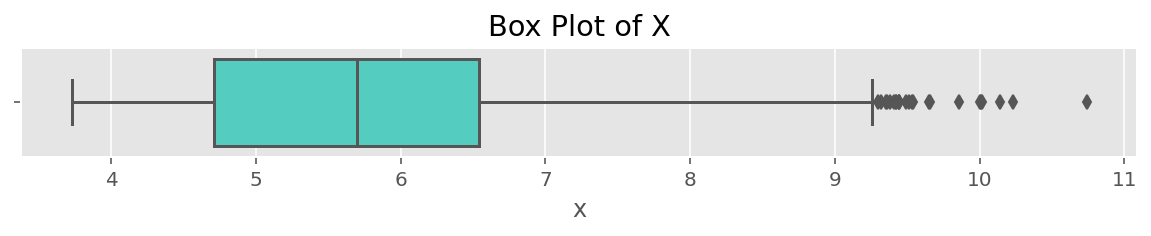

In [20]:
plt.figure(figsize = (10,1))
sns.boxplot(x=no_outliers_diamond_df["x"], color="turquoise").set_title("Box Plot of X")
plt.show()

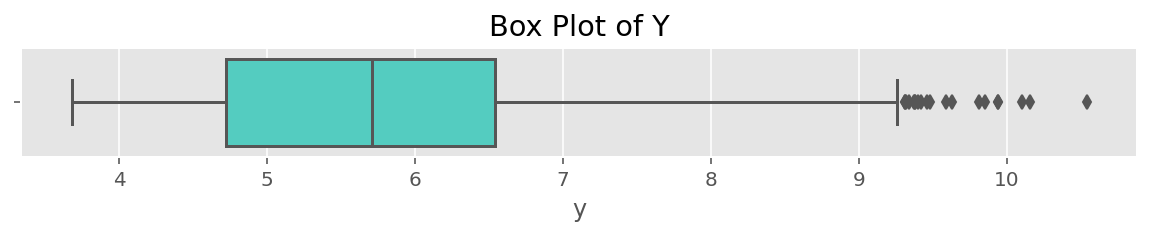

In [21]:
plt.figure(figsize = (10,1))
sns.boxplot(x=no_outliers_diamond_df["y"], color="turquoise").set_title("Box Plot of Y")
plt.show()

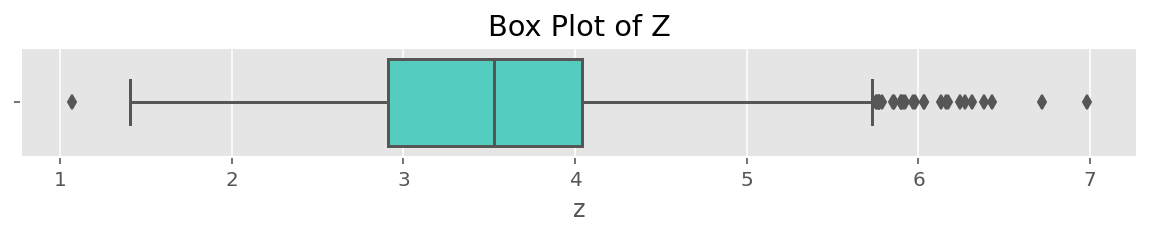

In [22]:
plt.figure(figsize = (10,1))
sns.boxplot(x=no_outliers_diamond_df["z"], color="turquoise").set_title("Box Plot of Z")
plt.show()

## Data Exploration and Visualisation
Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation <a id='univariate'></a>

#### Boxplot of Price
We see that the median price of diamonds in this dataset is around $2500. With around 75% of the dataset below $5000.
There are many outliers, relatively evenly distributed to around $18000.

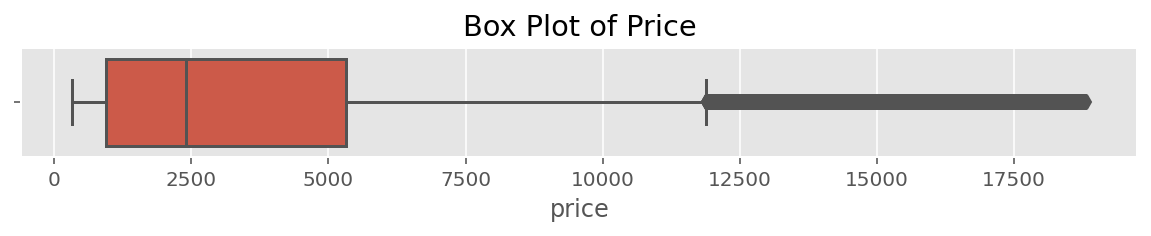

In [25]:
plt.figure(figsize = (10,1))
sns.boxplot(diamond_df['price']).set_title("Box Plot of Price")
plt.show()

#### Countplot of clarity
We see that the outer ends of clarity have a lower count, with the clarity grade of SI1 having the highest count.
I1 grade diamonds are much less common in this dataset.

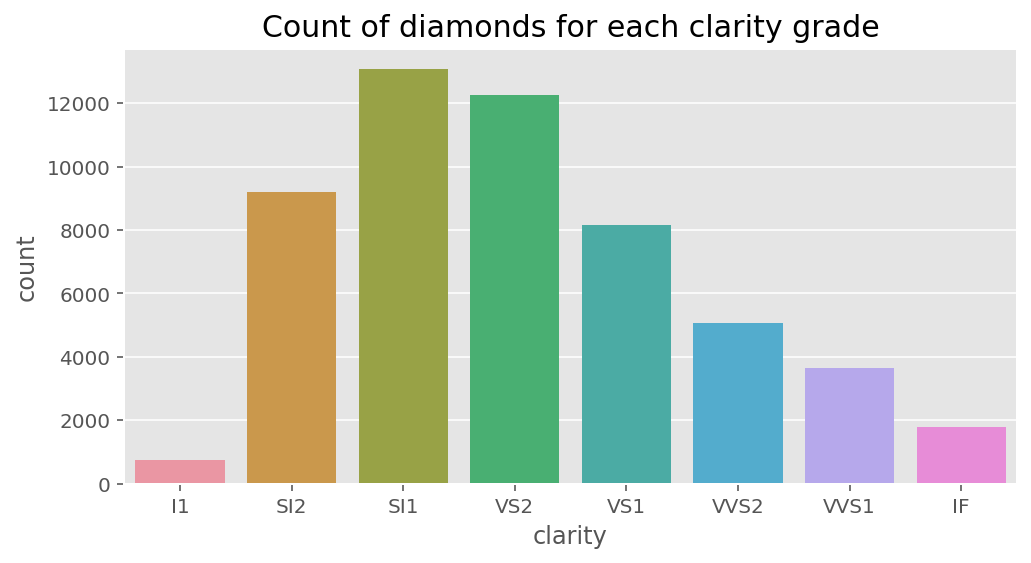

In [62]:
plt.figure(figsize = (8, 4))
fig = sns.countplot(x = 'clarity', data = diamond_df,
                    order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
fig = plt.title('Count of diamonds for each clarity grade', fontsize = 15)
plt.show()

#### Histograms of carat
By setting the bins value to a higher number, we observe that there are clumps of values - particularly around multiples of 0.1.

This observed multi-modality is unexpected in a continuous variable such as carat which should represent the weight of each diamond.

This could be caused by rounding too early or the grouping of diamonds into standard carat categories. This variable will need to be explored further in the second phase of the project.

The data is right skewed.

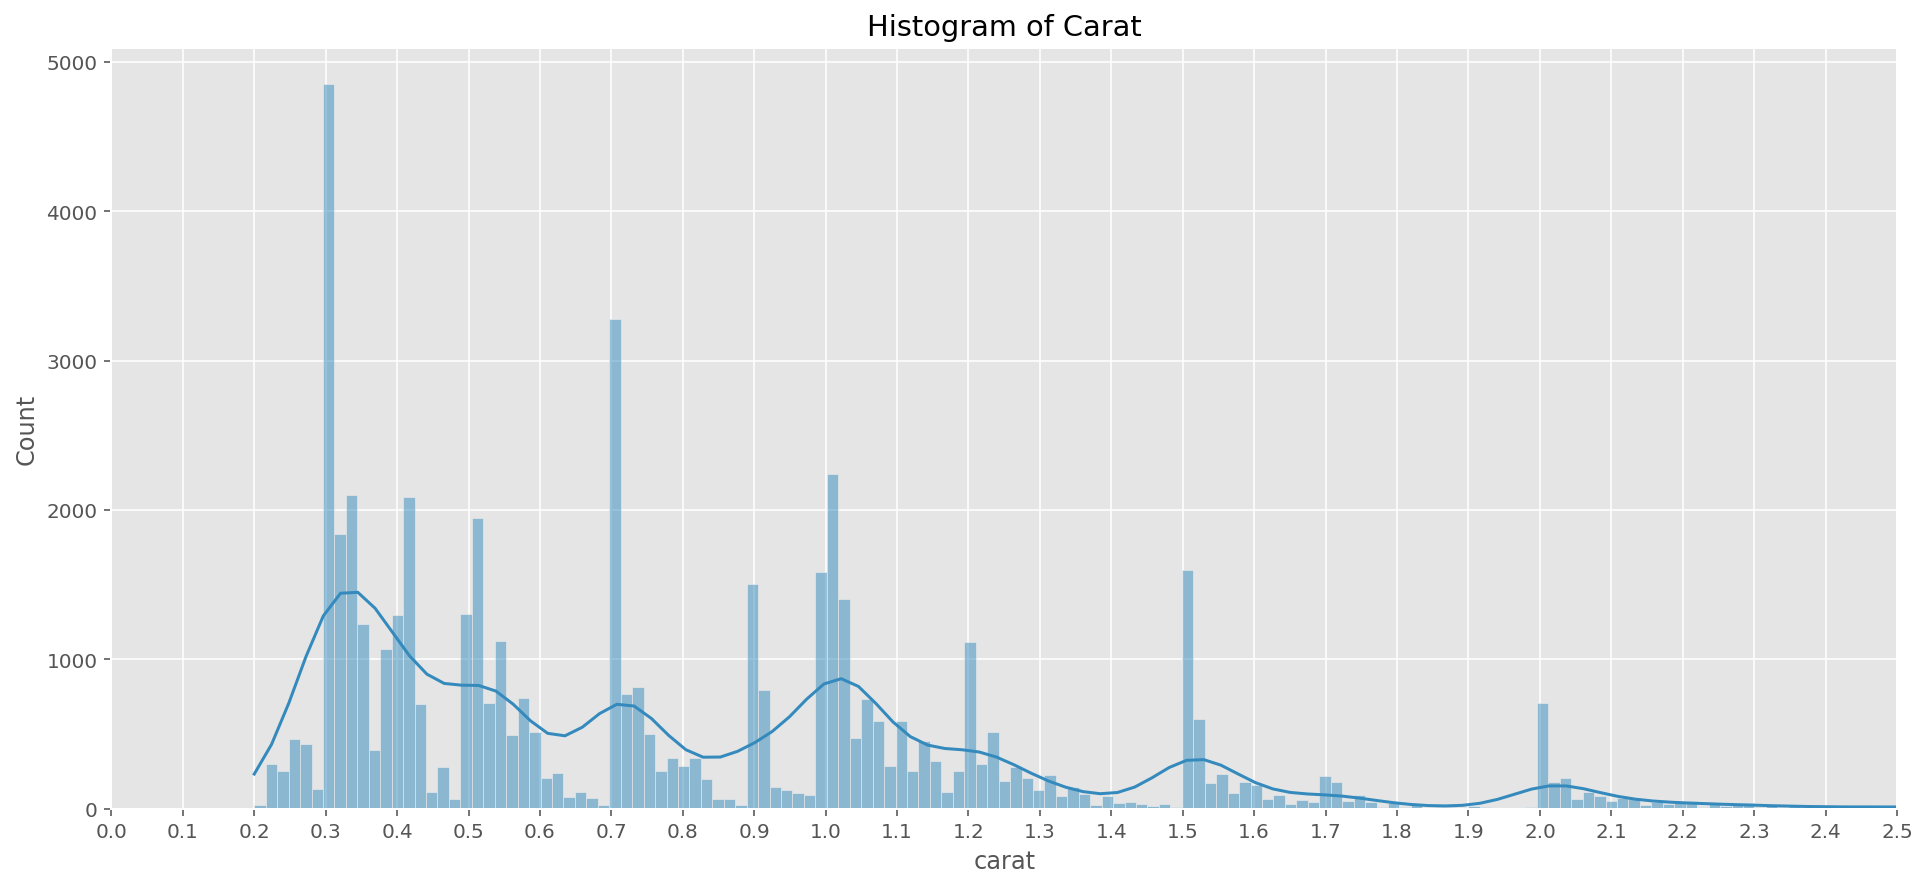

In [58]:
plt.figure(figsize = (16,7))
g = sns.histplot(diamond_df['carat'], kde=True, bins=300, stat="count")
g.set_title("Histogram of Carat")
g.set_xticks(np.arange(0, 6, 0.1))
plt.xlim(0, 2.5)
plt.show()

#### Countplot of carat
We see that the outer ends of color have a lower count, with the color grade of G having the highest count.
J grade diamonds are much less common in this dataset.

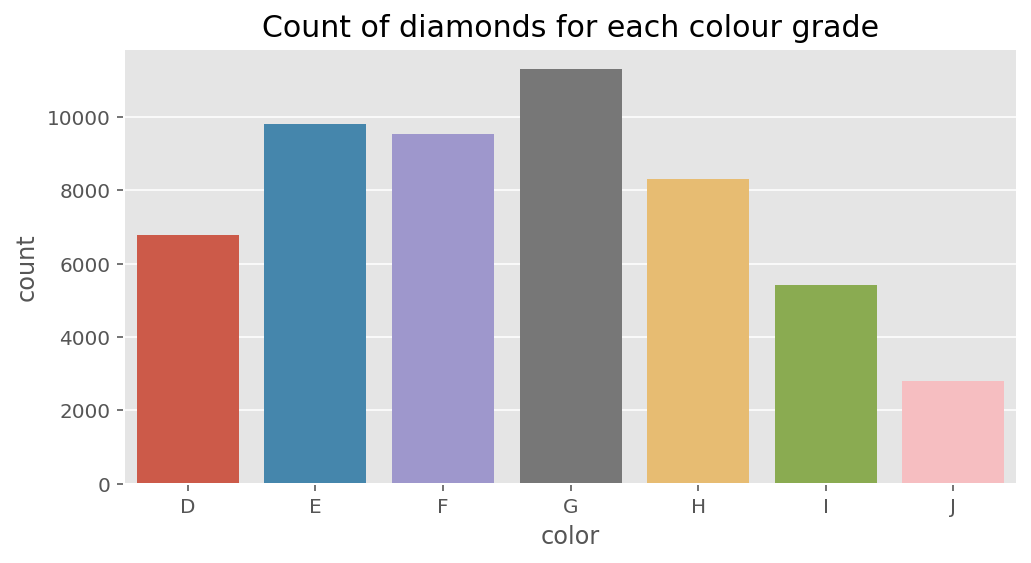

In [61]:
plt.figure(figsize = (8, 4))
fig = sns.countplot(x = 'color', data = diamond_df,
                    order=["D", "E", "F", "G", "H", "I", "J"])
fig = plt.title('Count of diamonds for each colour grade', fontsize = 15)
plt.show()

### Two-Variable Visualisation <a id='bivariate'></a>

#### Boxplots of price by color
We see that the average price increases as the color grade decreases.
* On initial inspection, it appears as if lower color grades (e.g. 'J'), lead to higher prices
* However, this could be explained by the fact that it is much rarer to find higher colour grade diamonds. They are probably found at lower carats on average, which would strongly affect the price.

We can explore this by graphing the carat against the colour grades below.

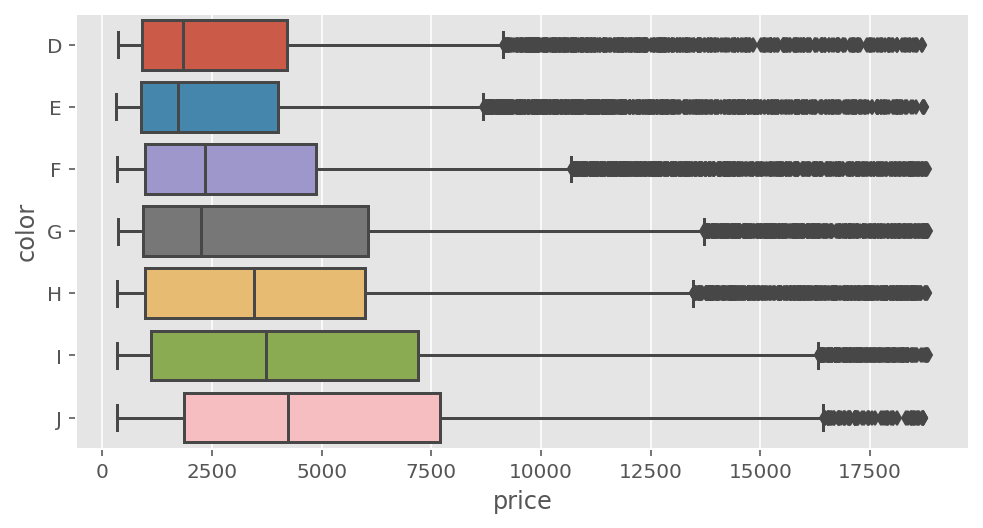

In [59]:
plt.figure(figsize = (8, 4))
sns.boxplot(x="price", y="color", data=diamond_df,
           order=["D", "E", "F", "G", "H", "I", "J"])
plt.show()

#### Boxplot of carat by color
As expected, higher colour grades have a lower median carat. Which could explain the unexpected association above. The effect of colour grades on price will be explored more in the multivariate section.

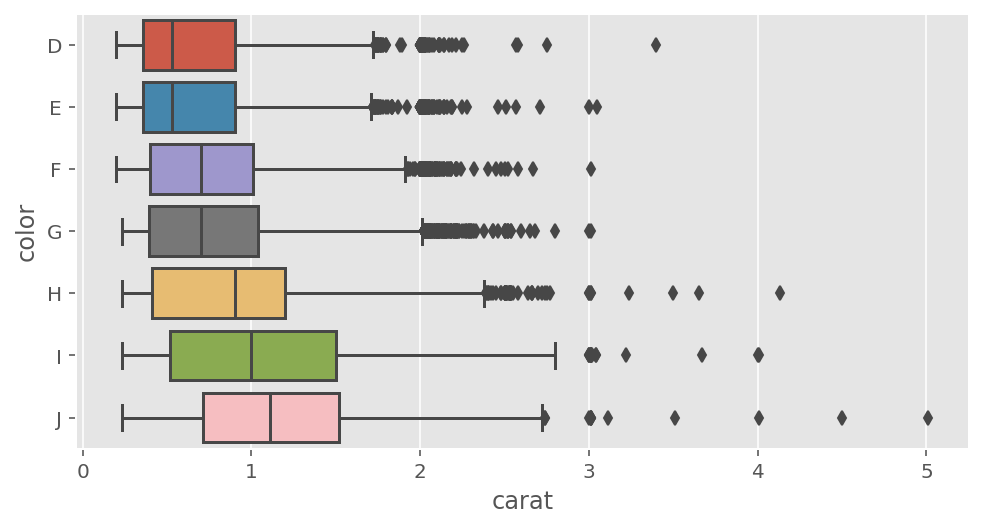

In [64]:
plt.figure(figsize = (8, 4))
sns.boxplot(x="carat", y="color", data=diamond_df,
           order=["D", "E", "F", "G", "H", "I", "J"])
plt.show()

#### Scatterplot of X against Y, and X against Z
* We can see that X and Y have an almost perfect 1-to-1 association, apart from a limited amount of outliers.
* The linear association between X and Z is weaker, but is still very significant.
* **X, Y, and Z have a quite strong linear association with each other, meaning that the diamonds in this dataset are all cut to a very similar shape - proportionally.** 

~~For phase 2, it is probably sufficient to use carat as part of the prediction of price instead of x, y, z or cuboidal volume. ~~

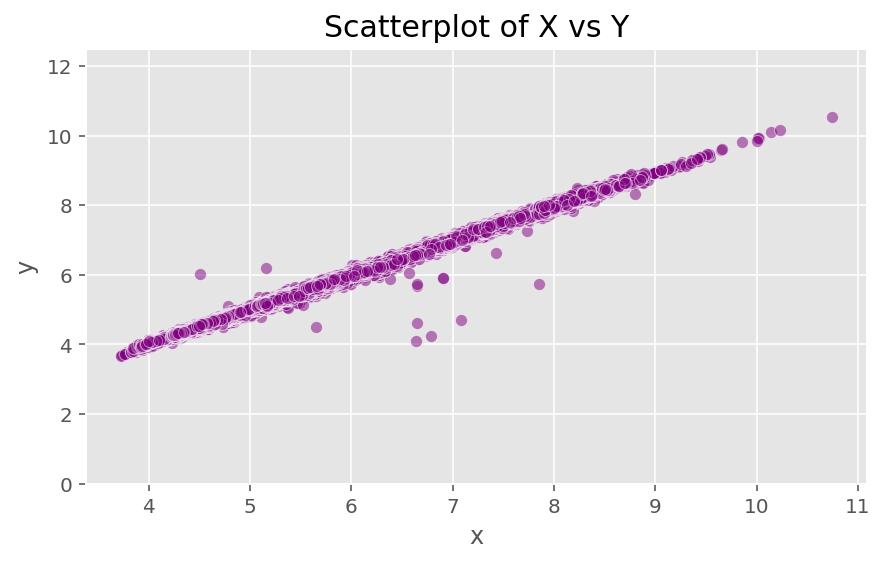

In [66]:
plt.figure(figsize = (7,4))
sns.scatterplot(x='x', y='y', alpha = 0.5, data=no_outliers_diamond_df, color="purple")
# Cutting off the outlier with Z = 35
plt.ylim(0, 12.5)
# plt.xlim(0, 12)
plt.title('Scatterplot of X vs Y', fontsize = 15)
plt.xlabel('x')
plt.ylabel('y')
plt.show();

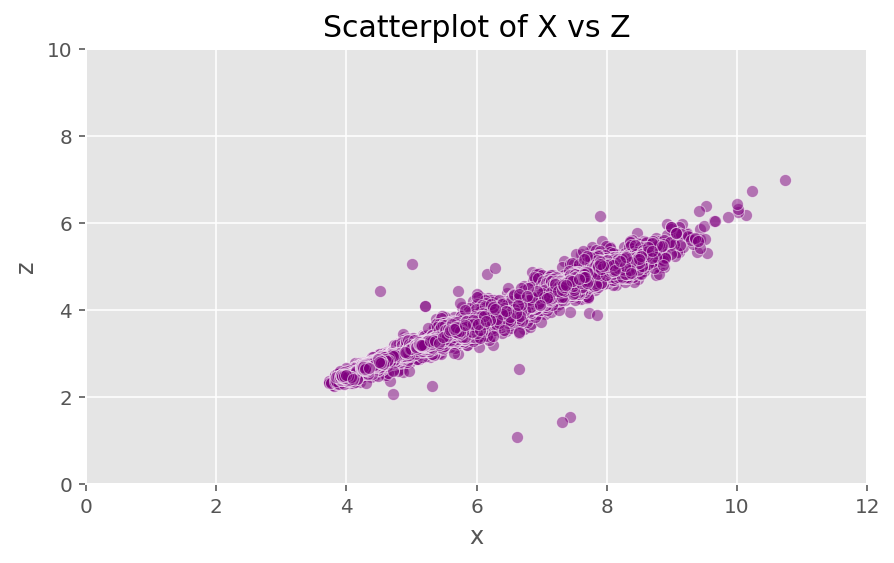

In [67]:
plt.figure(figsize = (7,4))
sns.scatterplot(x='x', y='z', alpha = 0.5, data=no_outliers_diamond_df, color="purple")
# Cutting off the outlier with Z = 35
plt.ylim(0, 10)
plt.xlim(0, 12)
plt.title('Scatterplot of X vs Z', fontsize = 15)
plt.xlabel('x')
plt.ylabel('z')
plt.show();

#### Scatterplot of Table/Depth against Price
We can see in both scatterplots that there is little to no association between table and price, and Depth and price, respectively.

Lower priced diamonds appear to have a greater range of tables and depths, while higher priced diamonds have a narrower range f table and depth values.

Overall, both independent variables appear to be weak predictors of price.

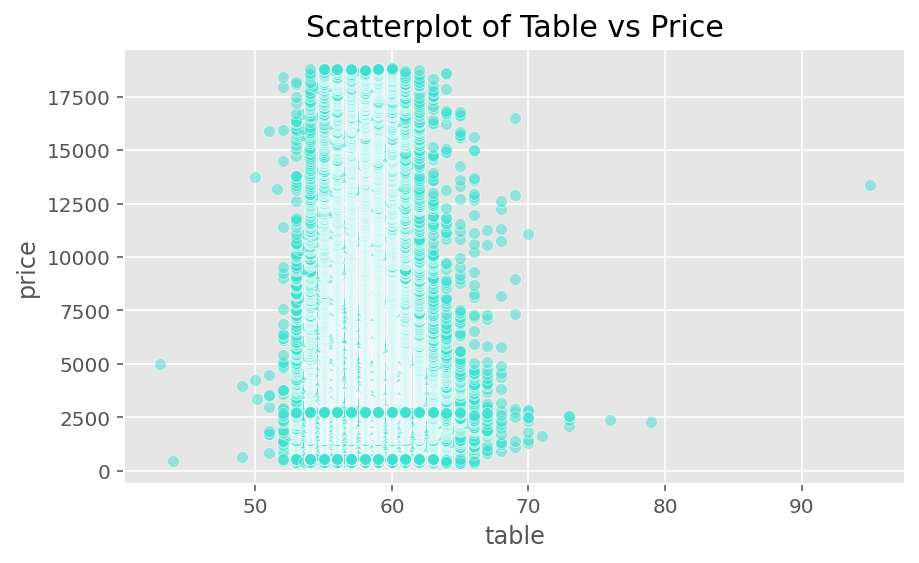

In [75]:
plt.figure(figsize = (7,4))
sns.scatterplot(x='table', y='price', alpha = 0.5, data=no_outliers_diamond_df, color="turquoise")
# Cutting off the outlier with Z = 35
# plt.ylim(0, 10)
# plt.xlim(40, 80)
plt.title('Scatterplot of Table vs Price', fontsize = 15)
plt.show();

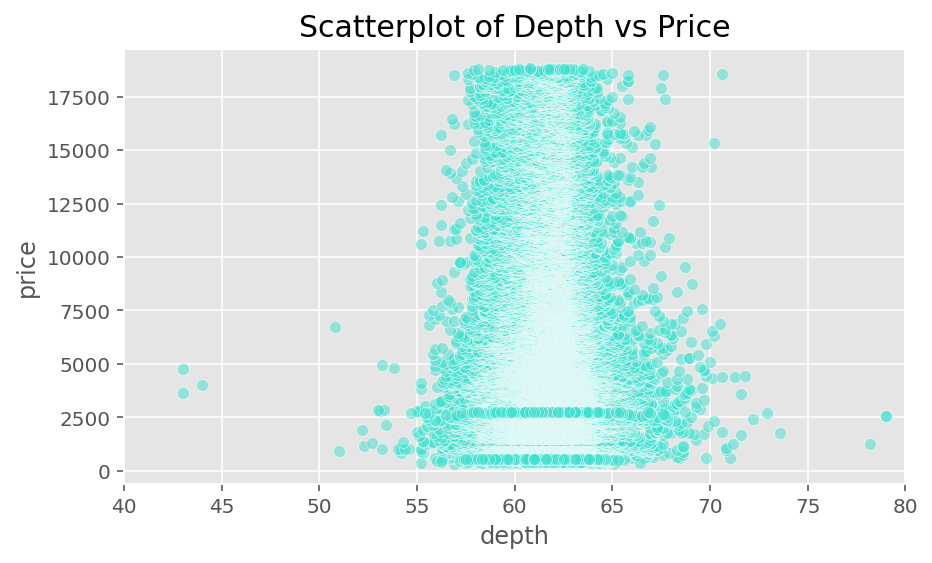

In [74]:
plt.figure(figsize = (7,4))
sns.scatterplot(x='depth', y='price', alpha = 0.5, data=no_outliers_diamond_df, color="turquoise")
# Cutting off the outlier with Z = 35
# plt.ylim(0, 10)
plt.xlim(40, 80)
plt.title('Scatterplot of Depth vs Price', fontsize = 15)
plt.show();

#### Countplot of Color and Clarity
We can see that either ends of the clarity grades are much less common in the dataset. Additionally, the two lowest color grades are less common overall compared to the rest.

Data for the I1 and IF clarity is the most limited in this dataset, so consideration may need to be given for how sampling is done to preserve these entries.


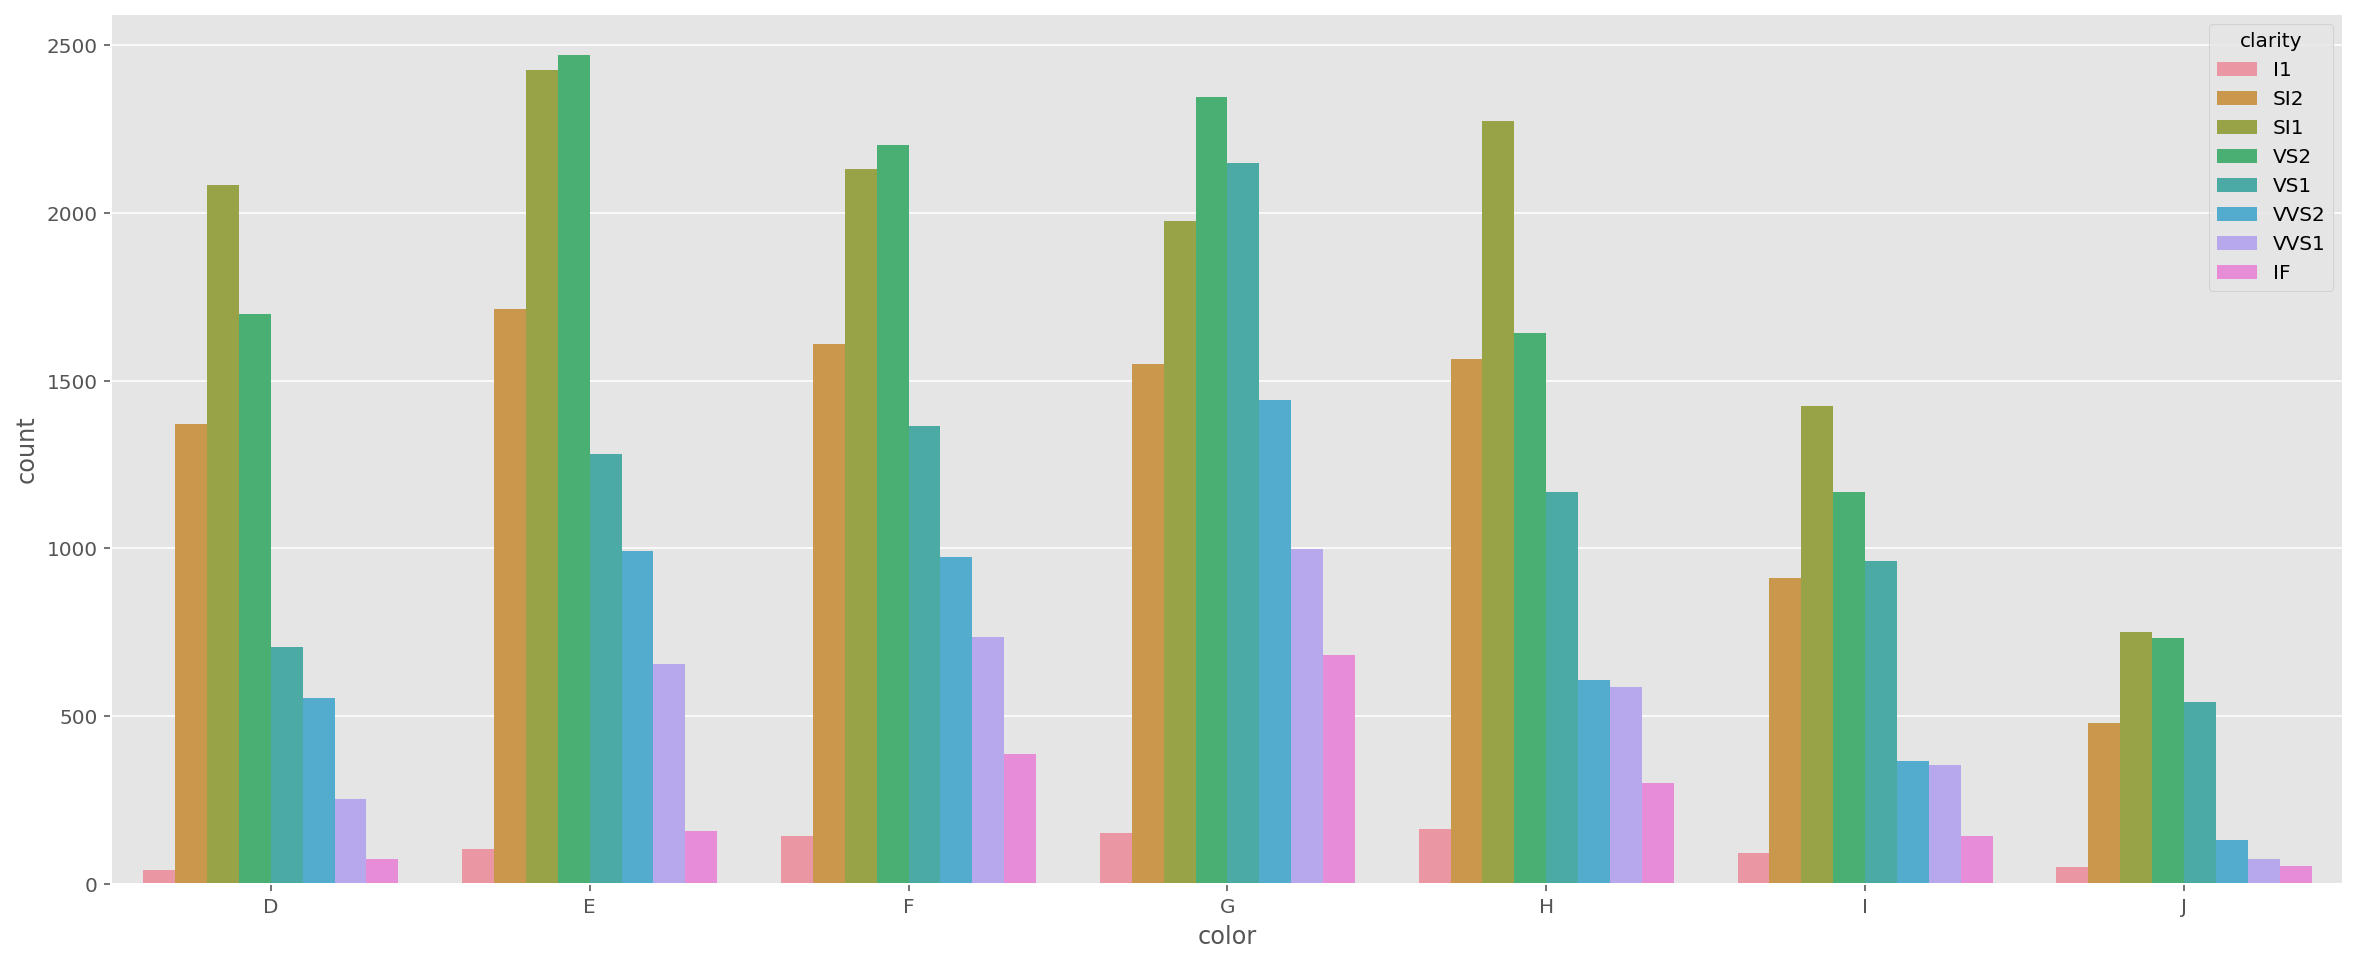

In [92]:
plt.figure(figsize = (20,8))
g = sns.countplot(x=diamond_df["color"],
               hue = diamond_df["clarity"],
               order=["D", "E", "F", "G", "H", "I", "J"],
               hue_order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
plt.show()

### Three-Variable Visualisation <a id='multivariate'></a>

#### Scatterplot of Price by Carat and Clarity
1. We see that there is a clear positive association between carat and price.
2. By separating each value further into their clarity grades by hue, an additional pattern can be observed. The association is split into bands of different clarity grades.
3. We can investigate further by exploring the price vs carat associations for each individual clarity grade and color grade, in separate scatterplots below.

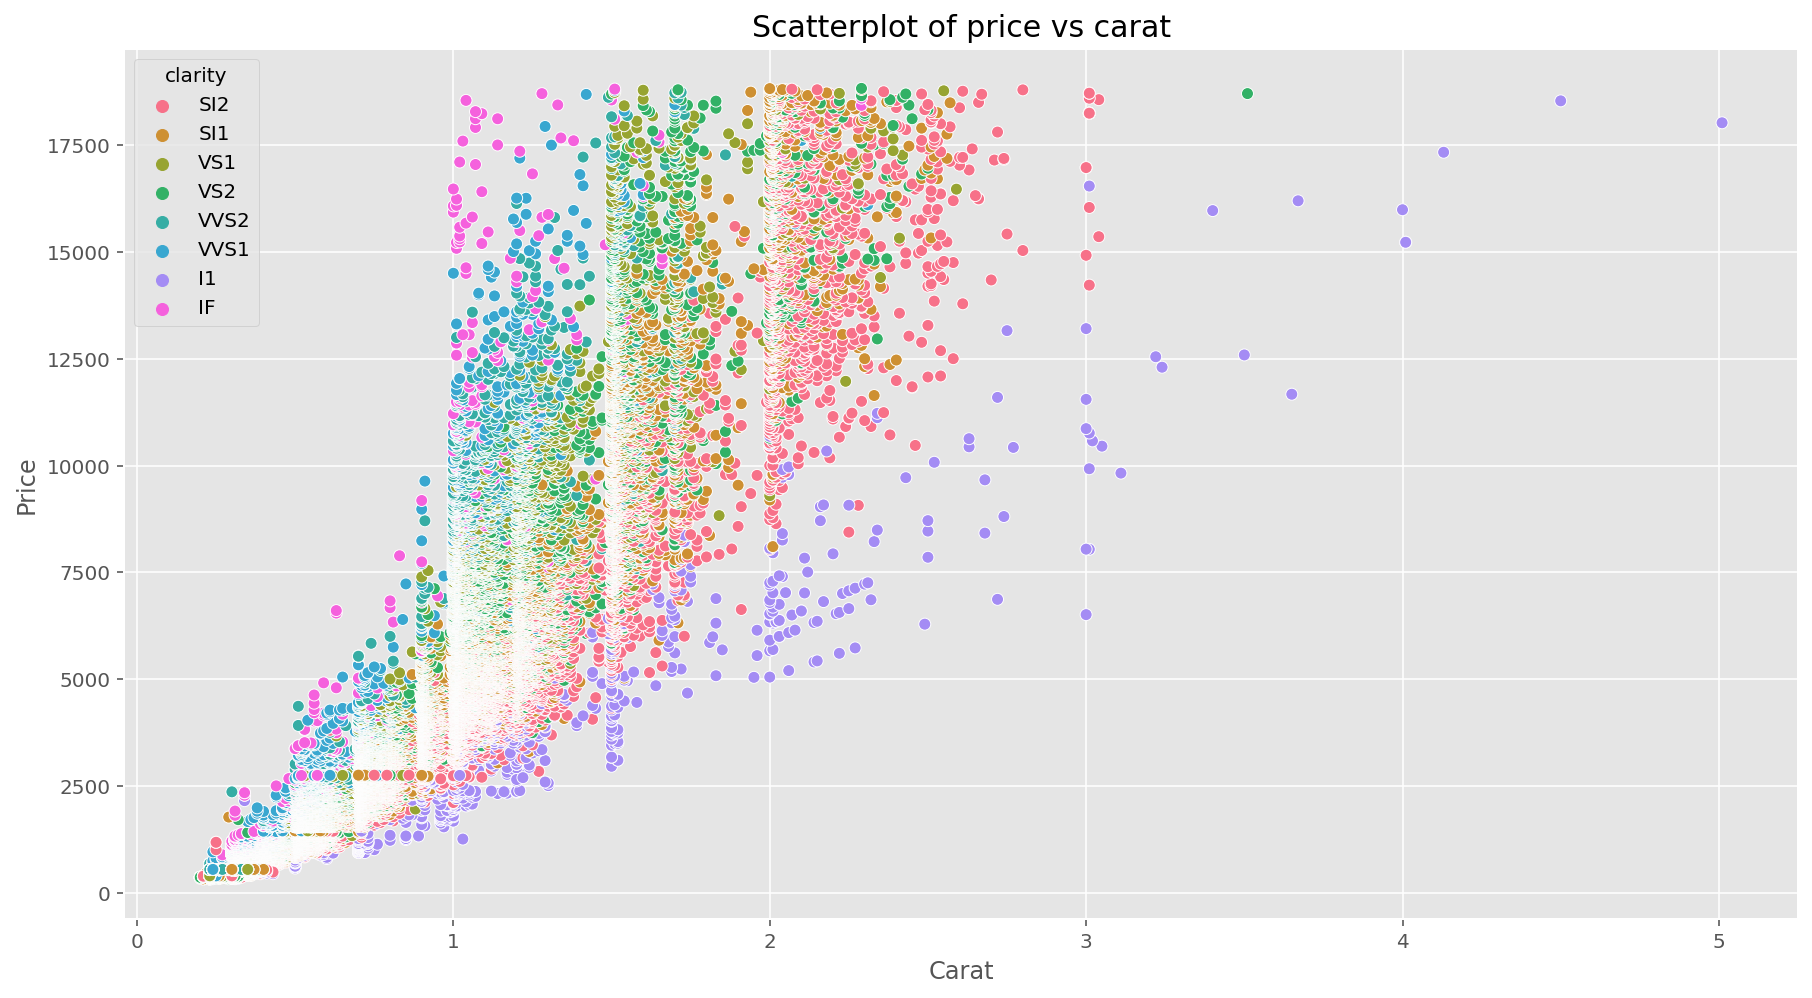

In [77]:
plt.figure(figsize = (15,8))
sns.scatterplot(x='carat', y='price', alpha = 1, data=diamond_df, hue="clarity")
plt.title('Scatterplot of price vs carat', fontsize = 15)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show();

#### Scatterplot of Price against Carat, split by Clarity and Color
We observe a stronger correlation between carat and price when we split the plots against a third variable - clarity or color.
In all plots, a positive, relatively linear association is observed between carat and price, however, splitting by clarity appears to produce a stronger correlation bertween carat and price.


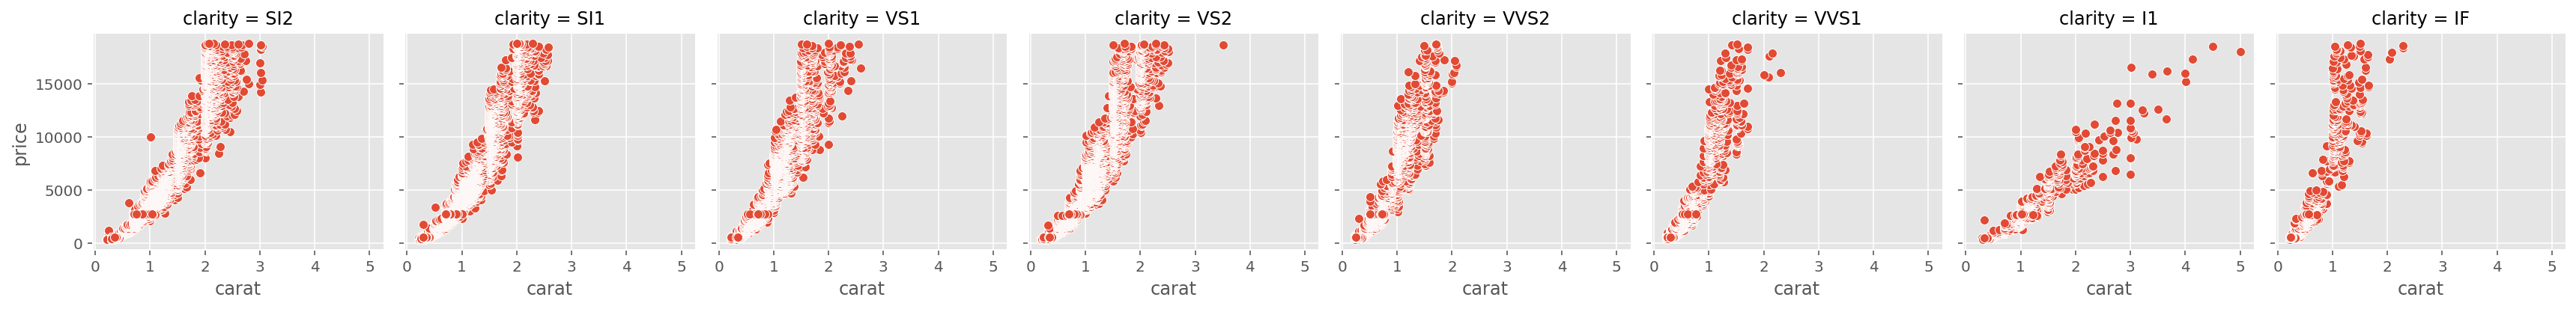

In [78]:
g = sns.FacetGrid(diamond_df, col="clarity")
g.map(sns.scatterplot, "carat", "price")
plt.show()

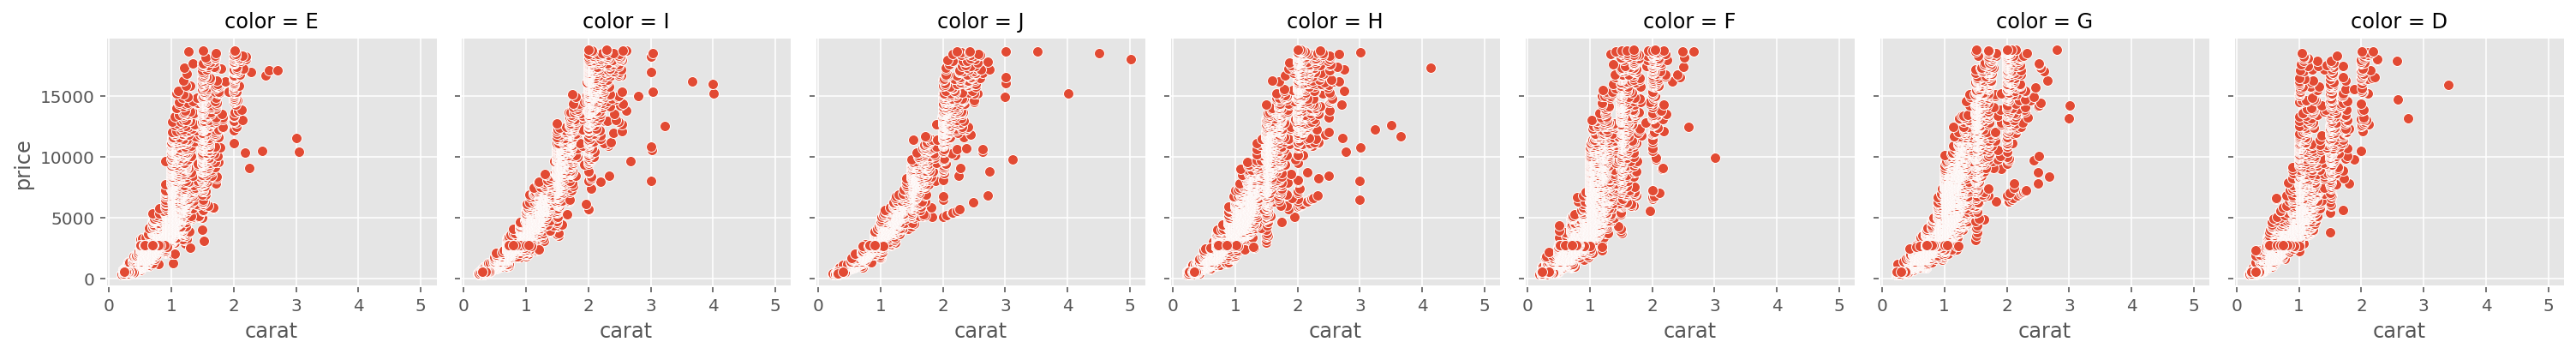

In [81]:
g = sns.FacetGrid(diamond_df, col="color")
g.map(sns.scatterplot, "carat", "price")
plt.show()

#### Boxplot of Price broken down by Color and Cut
We can see that the correlation between Cut and Price is inverted as we go from best to worse Color grades (D to J). For middle grade colours - F, G, H - cut appears to play a minimal role in affecting the price of a diamond.

The Ideal cut grade almost always has the lowest price in each color group (most likely explainable by Ideal cut diamonds existing in lower carats - which will be explored further in phase 2).

The spread of price appears to narrow as the color grade increases (high spread for J, lower spread for D).


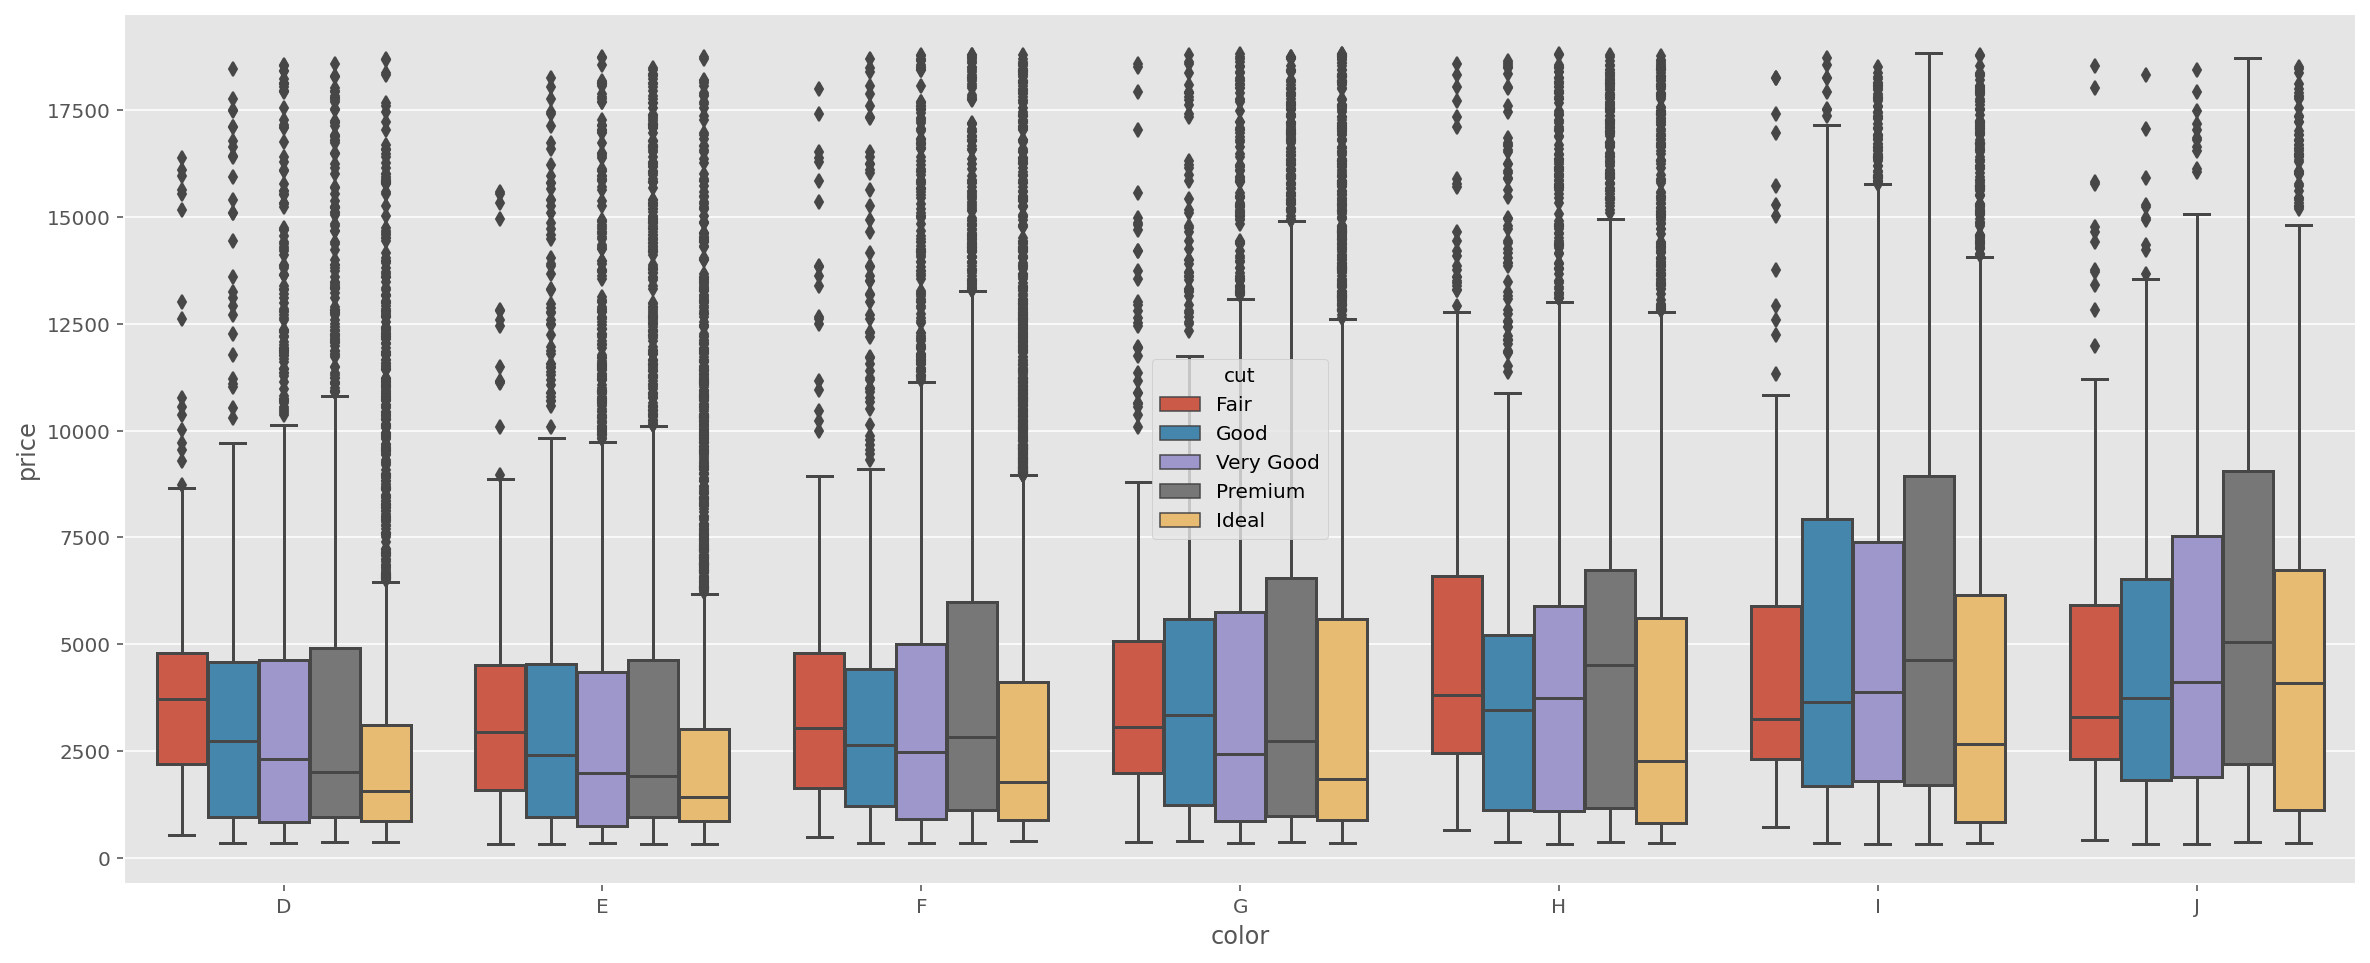

In [90]:
plt.figure(figsize = (20,8))
g = sns.boxplot(diamond_df["color"], diamond_df["price"],
               hue = diamond_df["cut"],
               order=["D", "E", "F", "G", "H", "I", "J"],
               hue_order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.show()

==============================================================================================================